In [1]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
train_df = pd.read_csv("dataset/wine_train.csv", sep=';', quotechar='"')
test_df = pd.read_csv("dataset/wine_test.csv", sep=';', quotechar='"')

In [3]:
X_train = train_df.drop("quality", axis=1)
y_train = train_df["quality"]

X_test = test_df.drop("quality", axis=1)
y_test = test_df["quality"]

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
model = Ridge(alpha=1.0)
model.fit(X_train_scaled, y_train)

Ridge()

In [6]:
y_pred = model.predict(X_test_scaled)

In [7]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [8]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.5691073466101487
R^2 Score: 0.2651683834929809


In [9]:
# Punctele cat mai apropiate de linia rosie = predictie mai buna

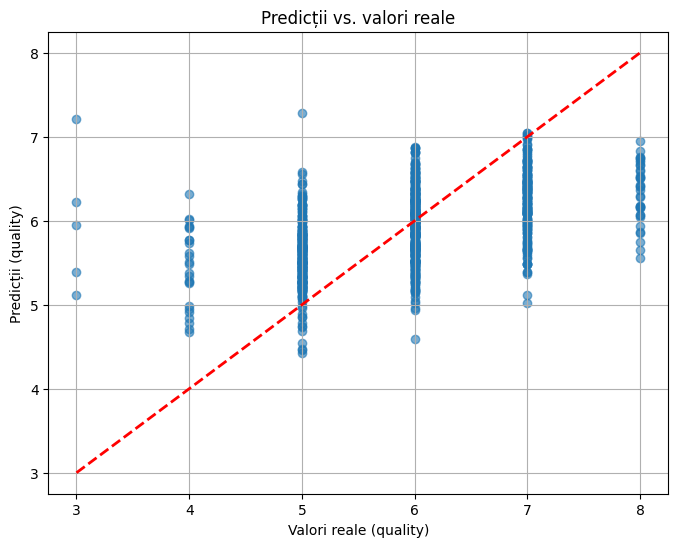

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valori reale (quality)")
plt.ylabel("Predicții (quality)")
plt.title("Predicții vs. valori reale")
plt.grid(True)
plt.show()


In [ ]:
# O distributie centrata in jurul lui 0 e buna. Erori mari in stanga/dreapta = modelul este mai slab

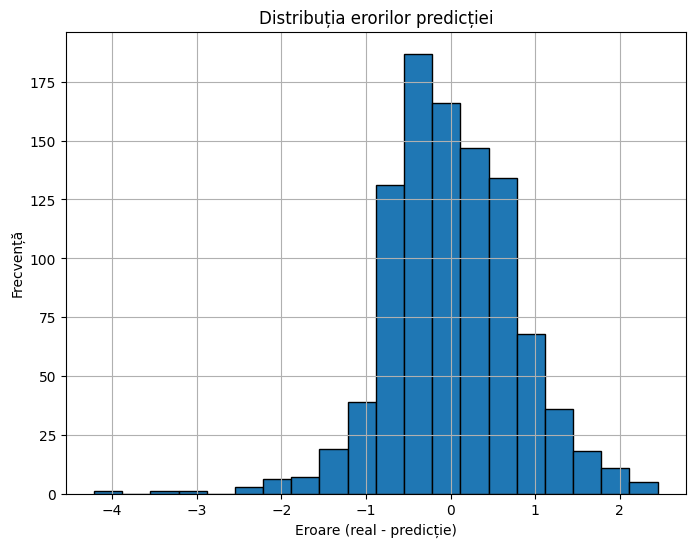

In [11]:
errors = y_test - y_pred

plt.figure(figsize=(8,6))
plt.hist(errors, bins=20, edgecolor="k")
plt.xlabel("Eroare (real - predicție)")
plt.ylabel("Frecvență")
plt.title("Distribuția erorilor predicției")
plt.grid(True)
plt.show()


In [ ]:
# Axa X: scorul real al vinului
# Axa Y: scorul prezis de model
# Pentru vinurile cu scoruri mici (3, 4), modelul supraestimează (prezice ~5.5–5.8)
# Pentru vinurile cu scoruri mari (7, 8), modelul subestimează (prezice ~6.2–6.5)

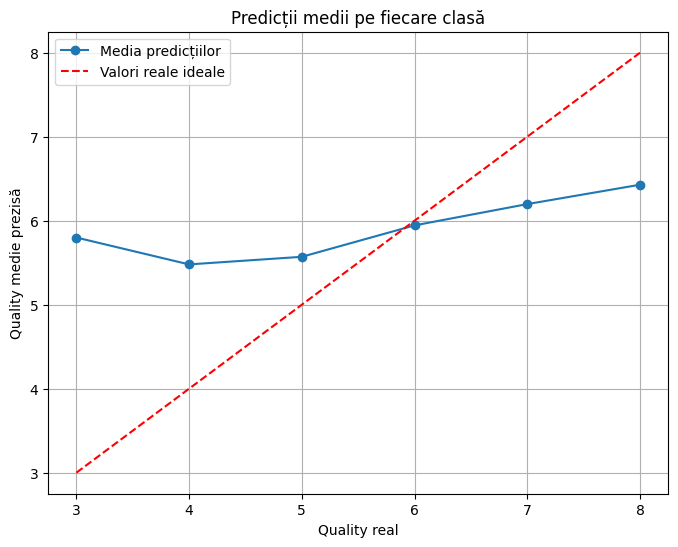

In [12]:
import numpy as np
import pandas as pd

# Creăm un DataFrame cu valori reale și predicții rotunjite
result_df = pd.DataFrame({
    "real": y_test,
    "predicted_rounded": y_pred.round()
})

# Grupăm după valoarea reală
grouped = result_df.groupby("real").mean()

plt.figure(figsize=(8,6))
plt.plot(grouped.index, grouped["predicted_rounded"], marker="o", label="Media predicțiilor")
plt.plot(grouped.index, grouped.index, 'r--', label="Valori reale ideale")
plt.xlabel("Quality real")
plt.ylabel("Quality medie prezisă")
plt.title("Predicții medii pe fiecare clasă")
plt.legend()
plt.grid(True)
plt.show()
